In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os

DIR = "/content/drive/MyDrive/Competitions/Signate/OCEAN180"
INPUT_DIR = os.path.join(DIR,"input")
OUTPUT_DIR = os.path.join(DIR,"output")

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

Mounted at /content/drive


In [2]:
import pandas as pd

sample_sub = pd.read_csv(os.path.join(INPUT_DIR,"submit_example.csv"), header=None)
sample_sub.columns = ["id","cover"]

exp51 = pd.read_csv(os.path.join(OUTPUT_DIR,"submit_lightgbm_seed42_ver51.csv"), header=None)
exp56 = pd.read_csv(os.path.join(OUTPUT_DIR,"submit_lightgbm_seed42_ver56.csv"), header=None)
exp51.columns = ["id","cover"]
exp56.columns = ["id","cover"]

In [3]:
sample_sub["cover"] = exp51.cover*.4 + exp56.cover*.6

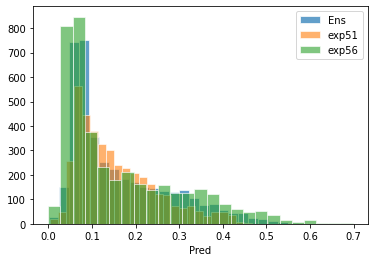

In [7]:
import matplotlib.pyplot as plt

plt.hist(sample_sub.cover, label="Ens", bins=25,edgecolor='white', alpha=.7)
plt.hist(exp51.cover, label="exp51", bins=25,edgecolor='white', alpha=.6)
plt.hist(exp56.cover, label="exp56", bins=25,edgecolor='white', alpha=.6)
plt.xlabel("Pred")
plt.legend()
plt.show()

In [5]:
sample_sub[["cover"]].to_csv(os.path.join(OUTPUT_DIR, f'submit_Ensemble_exp51_exp56.csv'), header=False)

In [6]:
sample_sub

,id,cover
0,0,0.014420
1,1,0.101684
2,2,0.071465
3,3,0.053271
4,4,0.437298
...,...,...
4034,4034,0.073869
4035,4035,0.059040
4036,4036,0.324843
4037,4037,0.181355
